In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import time 
import tensorflow as tf 
from tensorflow import keras

In [2]:
#查看tesorflow版本
print(tf.__version__)

2.3.1


### 一、切分数据

In [3]:
#导入fashion_mnist手写数字数据集
fashion_mnist=keras.datasets.fashion_mnist
#创建训练集和验证集
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
#将训练集进一步拆分成训练集和验证集合
#前5000张作为验证集，5000张之后都作为训练集
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

### 二、对数据做归一化

In [4]:
#归一化,归一化在深度学习中非常重要，可以有效的提高模型的准确率
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#归一化需要是二维矩阵，而这里的x_train,x_valid都是三维的所以需要先reshape（-1,1）,之后再reshape回三维的
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
#查看训练集合，测试集，验证集的数据形状
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


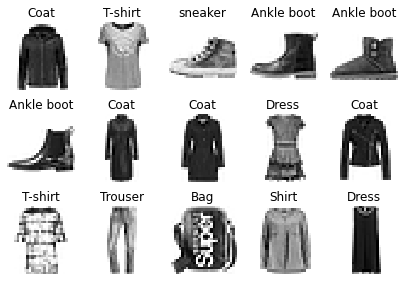

In [6]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_name):
    assert len(x_data)==len(y_data)
    assert n_rows*n_cols<len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index =n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off')
            plt.title(class_name[y_data[index]])
    plt.show()

class_name=['T-shirt','Trouser','pullover','Dress','Coat','Sandal','Shirt','sneaker','Bag','Ankle boot']
show_imgs(3,5,x_train,y_train,class_name)

### 三、模型构建

In [7]:
#tf.keras.models.sequential()
#实例化
model=keras.models.Sequential()
#添加输入层数据
model.add(keras.layers.Flatten(input_shape=[28,28]))
#添加全连接层
model.add(keras.layers.Dense(300,activation='relu'))
#再添加一层全连接层，这层要与上一层做连接
model.add(keras.layers.Dense(100,activation='relu'))
#添加输出层的层数，本次是一个10分类的问题，所以分成10份
model.add(keras.layers.Dense(10,activation='softmax'))

#定义激活函数
#relu:y=max(0,x),输入是x，输出是x和0两个数字中较大的一个
#softmax：将向量变成概率分布
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy']) 

In [8]:
#查看神经网络有多少层神经网络
model.layers

In [9]:
#查看模型架构
model.summary()
#[None,784]*w+b->[None,300] w.shape [784,300],b=[300]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 四、模型训练

In [14]:
#模型训练
history=model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.1184 - accuracy: 0.6822 - val_loss: 0.7239 - val_accuracy: 0.7774
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6503 - accuracy: 0.7792 - val_loss: 0.5770 - val_accuracy: 0.8034
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5548 - accuracy: 0.8046 - val_loss: 0.5150 - val_accuracy: 0.8178
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5056 - accuracy: 0.8198 - val_loss: 0.4783 - val_accuracy: 0.8324
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4751 - accuracy: 0.8298 - val_loss: 0.4556 - val_accuracy: 0.8412
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4546 - accuracy: 0.8373 - val_loss: 0.4393 - val_accuracy: 0.8474
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4391 - accuracy: 0.8425 - val_loss: 0.4276 - val_accuracy:

In [11]:
history.history

{'loss': [2.471951484680176,
  0.6788153648376465,
  0.5898804068565369,
  0.5395491719245911,
  0.4937301278114319,
  0.4628220200538635,
  0.4396125078201294,
  0.42048564553260803,
  0.40412554144859314,
  0.3898167610168457],
 'accuracy': [0.6694545745849609,
  0.7506363391876221,
  0.7784181833267212,
  0.7975999712944031,
  0.8213818073272705,
  0.8321454524993896,
  0.8399272561073303,
  0.8471999764442444,
  0.8519818186759949,
  0.8578181862831116],
 'val_loss': [0.8006981015205383,
  0.676628053188324,
  0.6698077917098999,
  0.5866159200668335,
  0.5509993433952332,
  0.5918887853622437,
  0.5148712992668152,
  0.49577969312667847,
  0.4945756494998932,
  0.47045859694480896],
 'val_accuracy': [0.7271999716758728,
  0.7752000093460083,
  0.7621999979019165,
  0.7835999727249146,
  0.8180000185966492,
  0.7972000241279602,
  0.8306000232696533,
  0.8367999792098999,
  0.8379999995231628,
  0.8420000076293945]}

### 查看模型效果

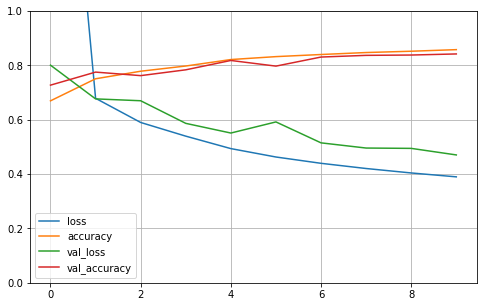

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)
#可以看出损失函数在不断的下降，准确率在不断的提升

In [15]:
#可以在测试集上进一步评估模型结果
model.evaluate(x_test_scaled,y_test)
#可以看到结果中测试集上loss是0.44,准确率是0.84

313/313 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8412


[0.4407428205013275, 0.8411999940872192]